In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
norm = lambda x: (x - np.mean(x, axis=0)) / (np.max(x, axis=0) - np.min(x, axis=0))
y_data = data.pop("quality")
data = pd.DataFrame(norm(np.array(data)), columns=data.columns)
x_data = data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, shuffle=True)

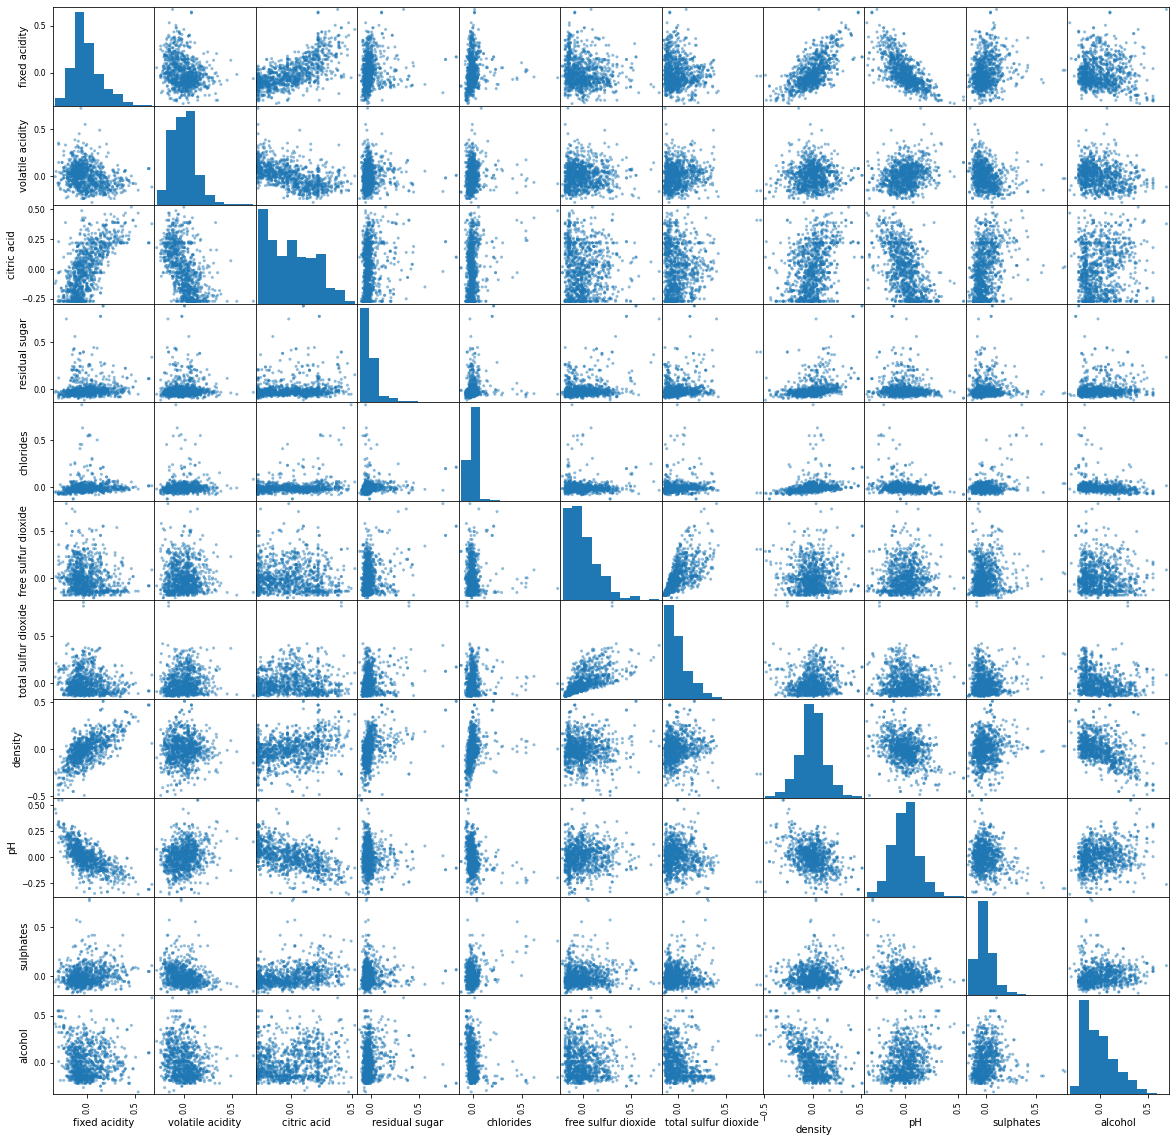

In [4]:
pd.plotting.scatter_matrix(x_train, figsize=[20, 20]);

In [5]:
class LinearRegression:
    def prediction(self, x):
        return np.dot(x, self.w) + self.b
    def step(self, x, y):
        error = self.prediction(x) - y
        gradient_w = self.w - self.lr * (np.dot(x.T, error) / len(error))
        gradient_b = self.b - self.lr * (np.mean(error))
        self.w = gradient_w
        self.b = gradient_b
    def cost(self, x, y):
        return (np.sum(self.prediction(x) - y)**2) / (2 * x.shape[0])
    def fit(self, x, y, lr, n_iter, x_test, y_test):
        self.w = np.ones(x.shape[1])
        self.b = 0
        self.lr = lr
        mse_history_train = list()
        mse_history_test = list()
        for i in range(n_iter):
            self.step(x, y)
            print(f"{i + 1} train iteration: error = {self.cost(x, y)}")
            print(f"{i + 1} test iteration: error = {self.cost(x_test, y_test)}")
            mse_history_train.append(self.cost(x, y))
            mse_history_test.append(self.cost(x_test, y_test))
        return mse_history_train, mse_history_test, self.w, self.b
    

In [ ]:
n_iter = 750
lr = 0.1
lin = LinearRegression()
mse_history_train, mse_history_test, w, b = lin.fit(x_train, y_train, lr, n_iter, x_test, y_test)

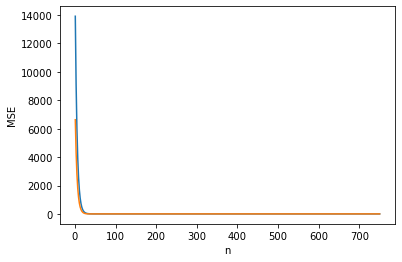

In [7]:
fig, ax = plt.subplots()
ax.plot([i for i in range(1, n_iter + 1)], mse_history_train)
ax.plot([i for i in range(1, n_iter + 1)], mse_history_test)
plt.ylabel('MSE')
plt.xlabel('n')
plt.show()

In [8]:
def get_prediction(x, w, b):
    return np.dot(x, w) + b
def get_cost(x, w, b, y):
    return (np.sum(get_prediction(x, w, b) - y)**2) / (2 * x.shape[0])
pred = np.around(get_prediction(x_test, w, b))
true = np.array(np.where((pred - y_test) == 0)).shape[1] / np.array(y_test).shape[0]
print(f"true = {true}")
table = pd.DataFrame({"Pred": pred, "True": y_test})
table.to_csv("pred.csv")


true = 0.5909090909090909
